Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing Dataset

In [2]:
data_set = pd.read_csv("/content/Dataset_master.xlsx - Salary Data Support Vector regr.csv")
#Grade vs Salary

x = data_set.iloc[:, 1:-1].values
y = data_set.iloc[:, -1].values


In [3]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [12]
 [13]]


In [4]:
print(y)

[  17000   27000   40000   65000  100000  150000  250000  400000  650000
 1000000 1800000 4000000]


Feature Scaling


In [6]:
y = y.reshape(len(y),1)

In [7]:
print(y)

[[  17000]
 [  27000]
 [  40000]
 [  65000]
 [ 100000]
 [ 150000]
 [ 250000]
 [ 400000]
 [ 650000]
 [1000000]
 [1800000]
 [4000000]]


In [10]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [11]:
print(x)

[[-1.52973232]
 [-1.25977956]
 [-0.9898268 ]
 [-0.71987403]
 [-0.44992127]
 [-0.17996851]
 [ 0.08998425]
 [ 0.35993702]
 [ 0.62988978]
 [ 0.89984254]
 [ 1.43974807]
 [ 1.70970083]]


In [12]:
print(y)

[[-0.62024154]
 [-0.61126879]
 [-0.59960421]
 [-0.57717233]
 [-0.54576769]
 [-0.50090393]
 [-0.4111764 ]
 [-0.27658511]
 [-0.05226629]
 [ 0.26178007]
 [ 0.9796003 ]
 [ 2.95360593]]


SVR model

In [13]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting new result

In [16]:
scaled_prediction = regressor.predict(sc_x.transform([[6.5]]))
prediction = sc_y.inverse_transform(scaled_prediction.reshape(-1, 1))
print(prediction)

[[298252.57347613]]


Visualising the result

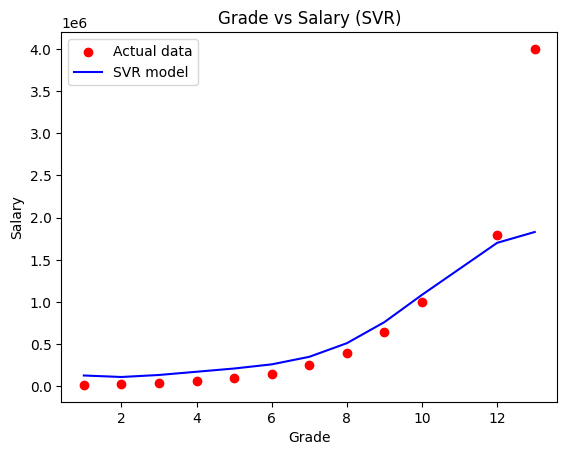

In [22]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red', label='Actual data')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1, 1)), color='blue', label='SVR model')
plt.title('Grade vs Salary (SVR)')
plt.xlabel('Grade')
plt.ylabel('Salary')
plt.legend()
plt.show()